In [199]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [200]:
##查看关于corrected中的数据
data = pd.read_csv('./dataset/kddcup.data_10_percent_corrected', header=None)

features_single_tcp_connetct_columns=["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes","land", "wrong_fragment", "urgent"]#单一TCP连接特征
features_Content_features_columns = ["hot", "num_failed_logins", "logged_in","num_compromised", "root_shell", "su_attempted", "num_root",  #登录特征
    "num_file_creations","num_shells", "num_access_files", "num_outbound_cmds", "is_host_login","is_guest_login"]
features_Traffic_within_twoscconds_columns =["count", "srv_count", "serror_rate", "srv_serror_rate","rerror_rate", 
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate","srv_diff_host_rate"]
features_DST_Traffic_within_twoscconds_columns = [  "dst_host_count", "dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate", "dst_host_srv_serror_rate","dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
label = ["label"]
columns = features_single_tcp_connetct_columns+features_Content_features_columns+features_Traffic_within_twoscconds_columns+features_DST_Traffic_within_twoscconds_columns+label
data.columns = columns

In [201]:
#删除全零向量
data.drop(columns=['num_outbound_cmds','is_host_login'],inplace=True)
features_Content_features_columns.remove('num_outbound_cmds')
features_Content_features_columns.remove('is_host_login')

In [202]:
#str变为数值类型
categorical_columns = ["protocol_type", "service", "flag"]
label_encoders = {}
for col in categorical_columns:
    all_categories = data[col].unique()
    label_encoders[col] = LabelEncoder()
    label_encoders[col].fit(all_categories)
    data[col] = label_encoders[col].transform(data[col])
#攻击类型
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}
#标签数字化
label_data=data['label']
le = LabelEncoder()
#小类标签数字化，共23小类
labels_23_category =le.fit_transform(label_data).astype(np.int64)
data["label_digit"]= labels_23_category
#添加大类标签，共五大类
data['attack_type'] = data.label.apply(lambda r:attacks_types[r[:-1]])
target2=data["attack_type"]
#小类标签数字化
labels_5_category =le.fit_transform(target2).astype(np.int64)
data["attack_type_digit"]=labels_5_category

In [203]:
#保留这个数据，后面用于合并到处理后的数据中保存
labels=data[['label','label_digit','attack_type','attack_type_digit']]
labels

,label,label_digit,attack_type,attack_type_digit
0,normal.,11,normal,1
1,normal.,11,normal,1
2,normal.,11,normal,1
3,normal.,11,normal,1
4,normal.,11,normal,1
...,...,...,...,...
494016,normal.,11,normal,1
494017,normal.,11,normal,1
494018,normal.,11,normal,1
494019,normal.,11,normal,1


In [204]:
#删除，为了后面整体相关性分析
x= data.drop(columns=labels)

In [205]:
data['label'].value_counts() #统计标签数量

label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [206]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label_digit,attack_type,attack_type_digit
0,0,1,22,9,181,5450,0,0,0,0,...,0.11,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
1,0,1,22,9,239,486,0,0,0,0,...,0.05,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
2,0,1,22,9,235,1337,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
3,0,1,22,9,219,1337,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
4,0,1,22,9,217,2032,0,0,0,0,...,0.02,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,0.01,0.05,0.00,0.01,0.0,0.0,normal.,11,normal,1
494017,0,1,22,9,282,2286,0,0,0,0,...,0.17,0.05,0.00,0.01,0.0,0.0,normal.,11,normal,1
494018,0,1,22,9,203,1200,0,0,0,0,...,0.06,0.05,0.06,0.01,0.0,0.0,normal.,11,normal,1
494019,0,1,22,9,291,1200,0,0,0,0,...,0.04,0.05,0.04,0.01,0.0,0.0,normal.,11,normal,1


In [207]:
#读取不同特征的数据，准备分别做相关性分析
single_connect_data = data[features_single_tcp_connetct_columns]
Content_data = data[features_Content_features_columns]
SrcTraffic_data = data[features_Traffic_within_twoscconds_columns]
DstTraffic_data = data[features_DST_Traffic_within_twoscconds_columns]

In [208]:
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label_digit,attack_type_digit
count,494021.000000,494021.000000,494021.000000,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,0.467132,23.408894,7.842446,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,...,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,14.546274,0.220796
std,707.746472,0.575606,13.538332,2.250853,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,...,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,4.161397,0.451233
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,9.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
50%,0.000000,0.000000,14.000000,9.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
75%,0.000000,1.000000,42.000000,9.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
max,58329.000000,2.000000,65.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,4.000000


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'protocol_type'}>,
        <Axes: title={'center': 'service'}>],
       [<Axes: title={'center': 'flag'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>],
       [<Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>]], dtype=object)

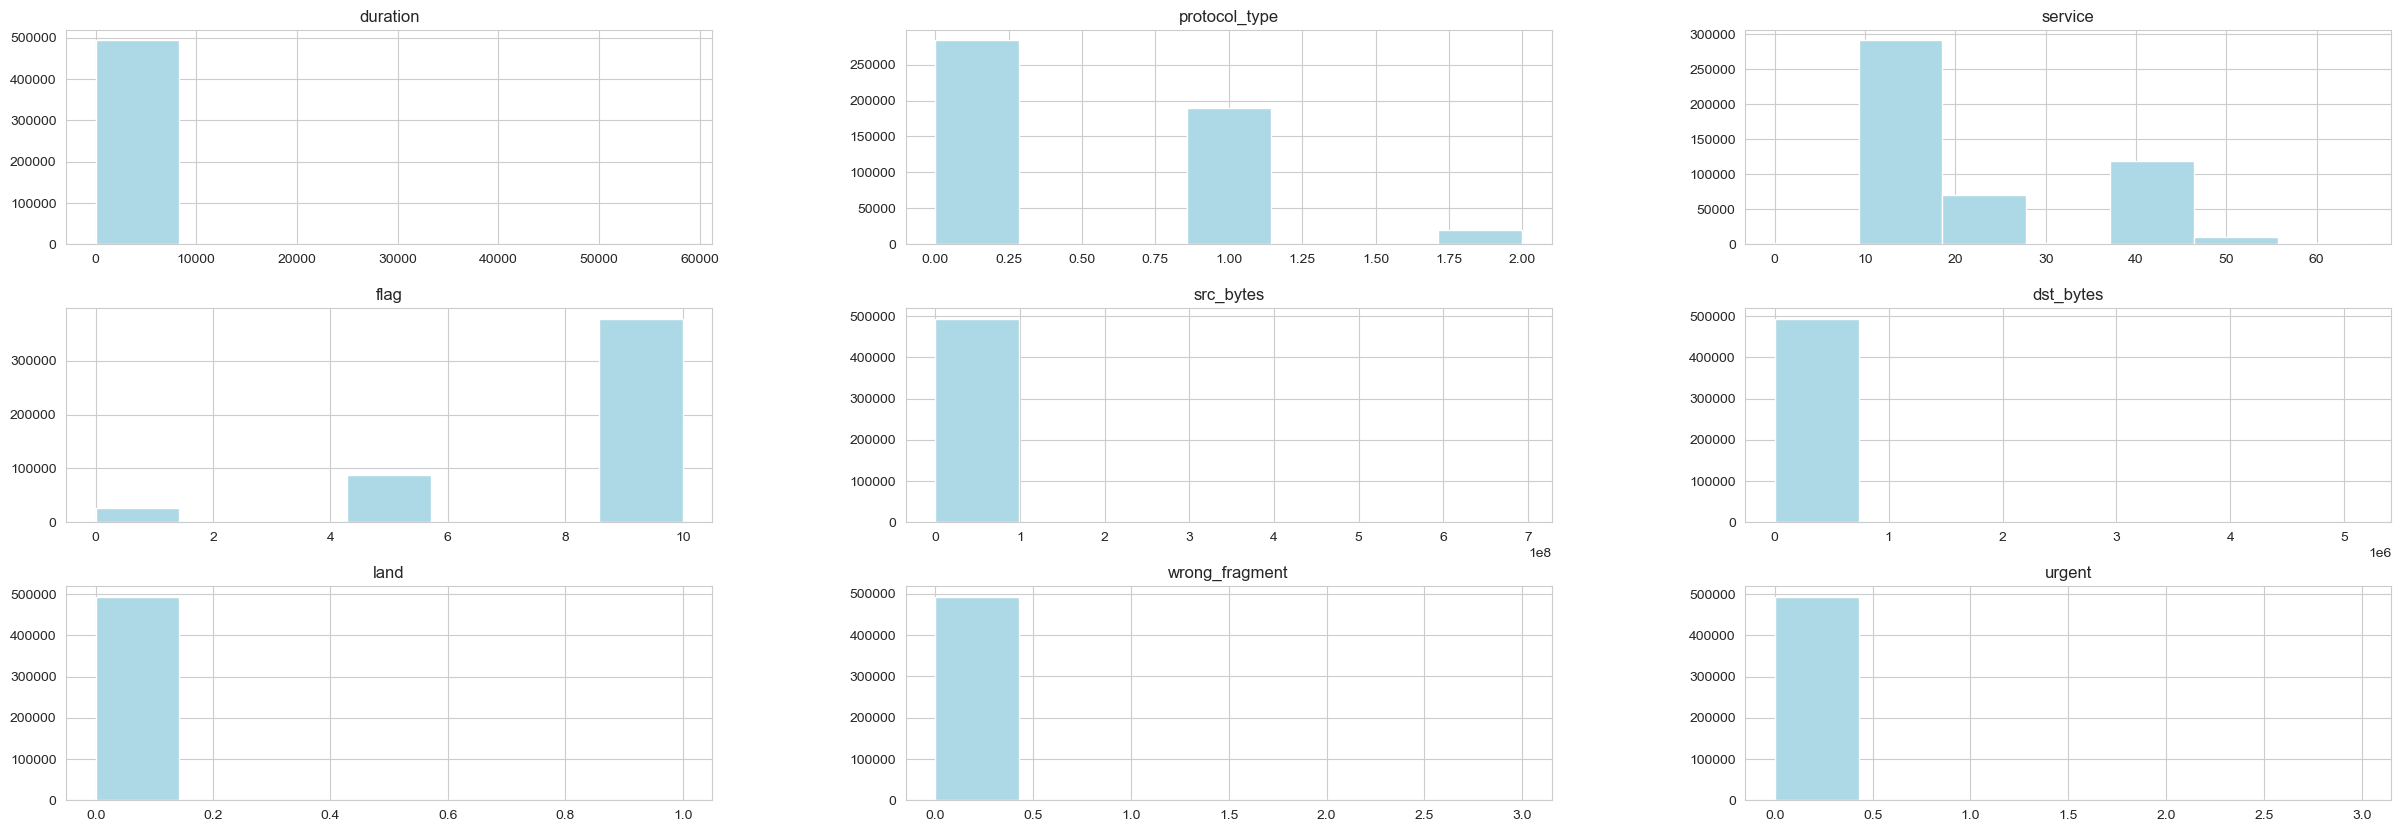

In [209]:
single_connect_data.hist(figsize=(30, 10), bins=7, color='lightblue') #单个TCP连接

array([[<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>],
       [<Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>],
       [<Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'is_guest_login'}>, <Axes: >]],
      dtype=object)

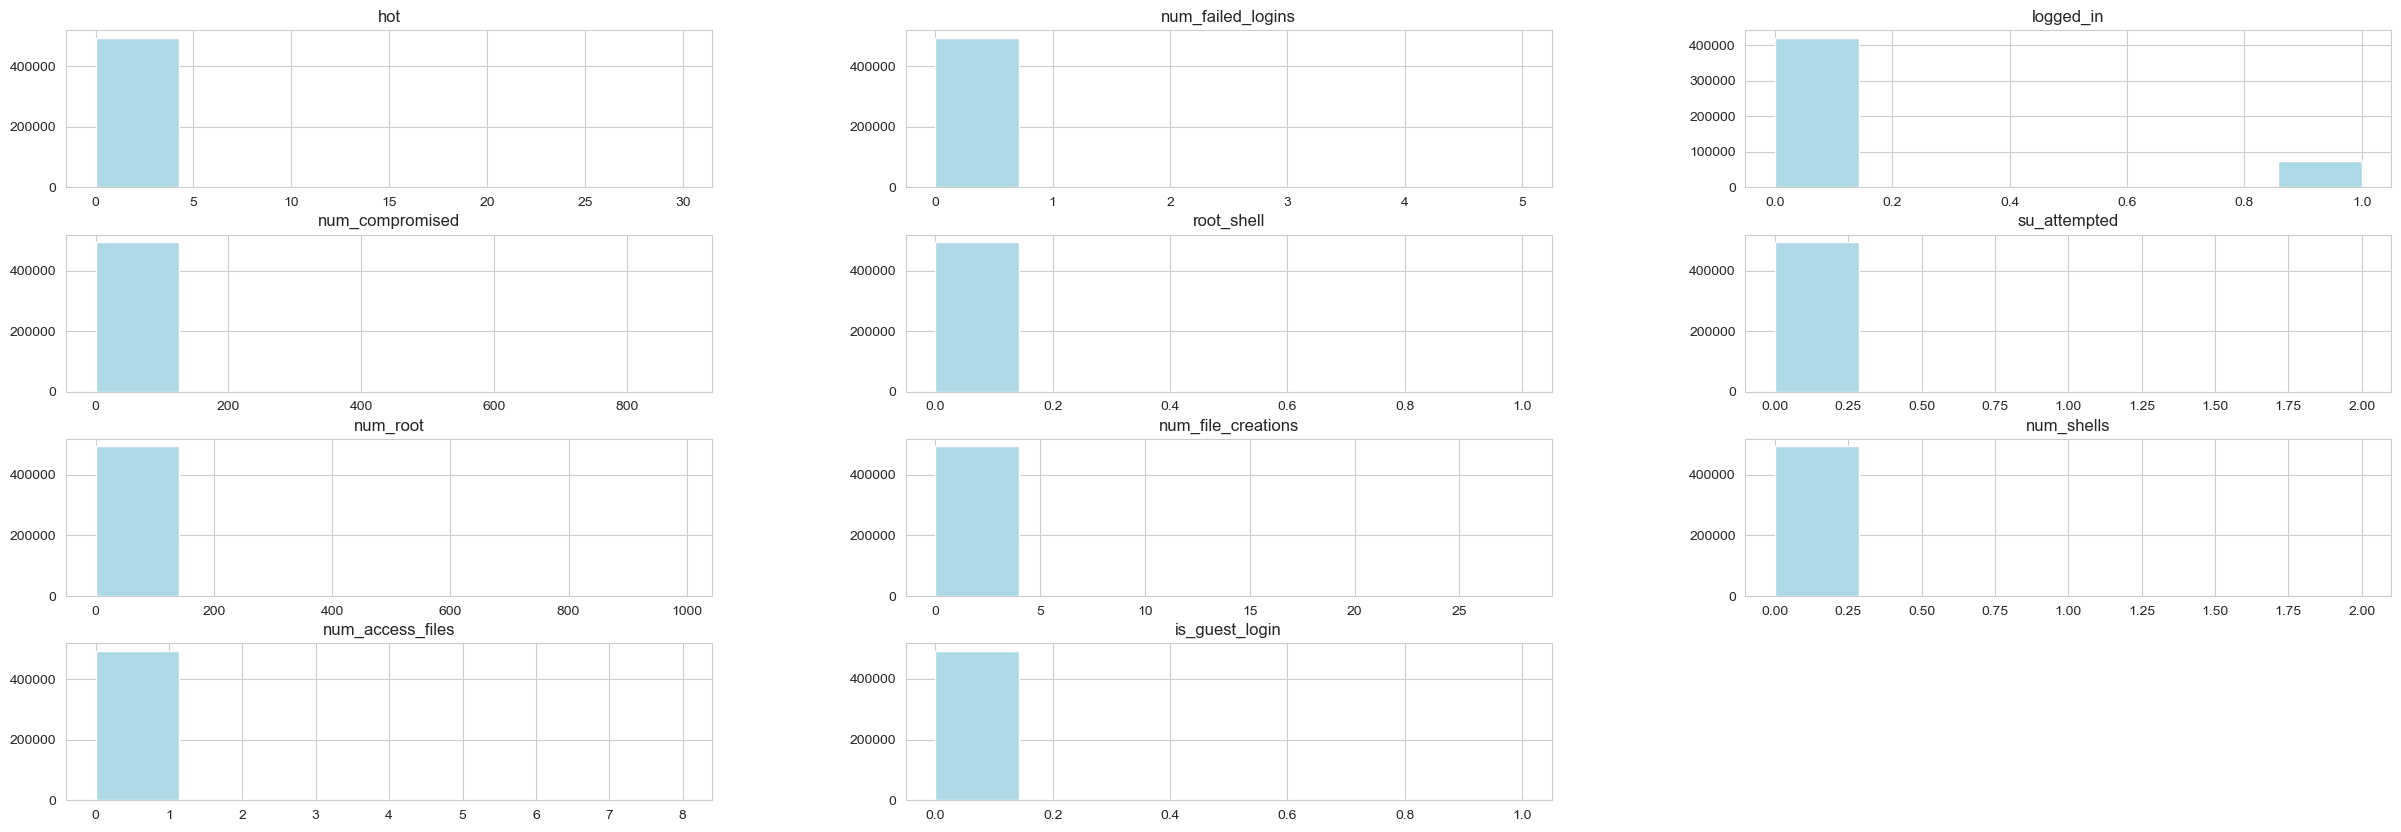

In [210]:
Content_data.hist(figsize=(30, 10), bins=7, color='lightblue') #连接特征

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'srv_count'}>,
        <Axes: title={'center': 'serror_rate'}>],
       [<Axes: title={'center': 'srv_serror_rate'}>,
        <Axes: title={'center': 'rerror_rate'}>,
        <Axes: title={'center': 'srv_rerror_rate'}>],
       [<Axes: title={'center': 'same_srv_rate'}>,
        <Axes: title={'center': 'diff_srv_rate'}>,
        <Axes: title={'center': 'srv_diff_host_rate'}>]], dtype=object)

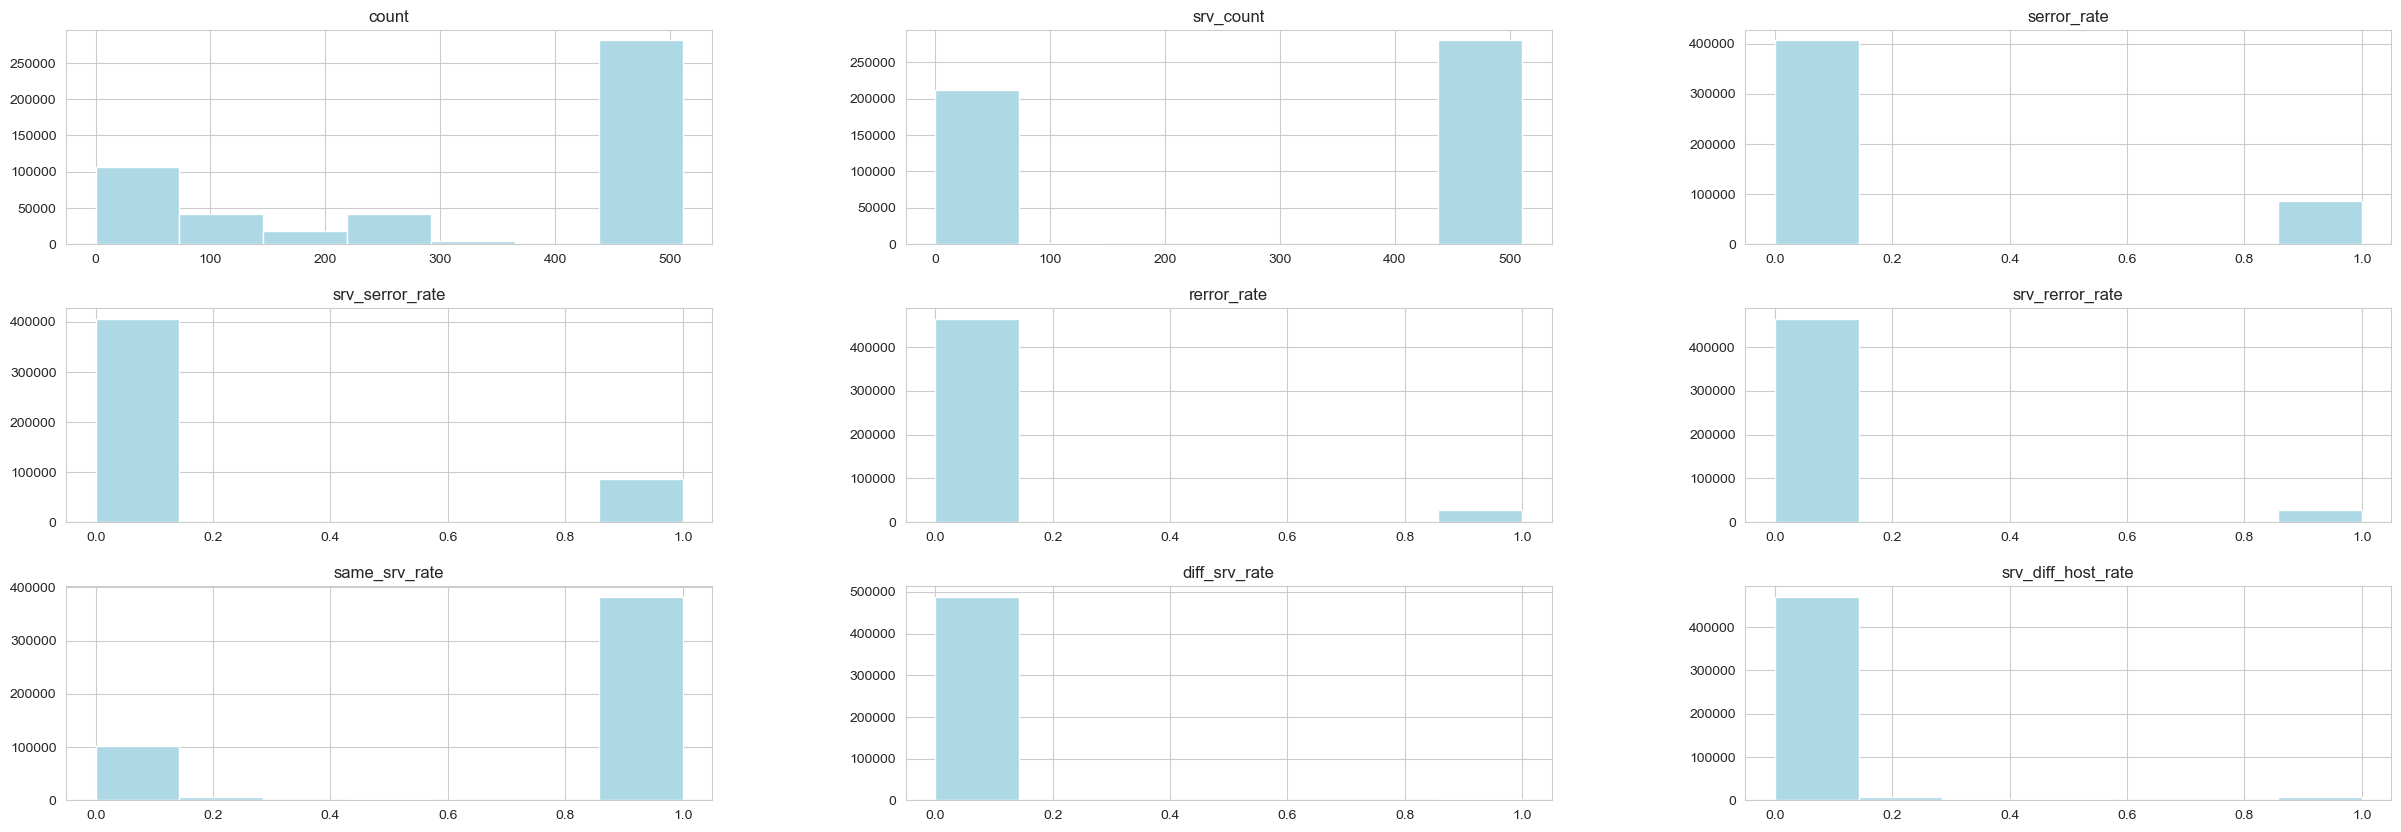

In [211]:
SrcTraffic_data.hist(figsize=(30, 10), bins=7, color='lightblue') #本机 传输数据特征

array([[<Axes: title={'center': 'dst_host_count'}>,
        <Axes: title={'center': 'dst_host_srv_count'}>,
        <Axes: title={'center': 'dst_host_same_srv_rate'}>],
       [<Axes: title={'center': 'dst_host_diff_srv_rate'}>,
        <Axes: title={'center': 'dst_host_same_src_port_rate'}>,
        <Axes: title={'center': 'dst_host_srv_diff_host_rate'}>],
       [<Axes: title={'center': 'dst_host_serror_rate'}>,
        <Axes: title={'center': 'dst_host_srv_serror_rate'}>,
        <Axes: title={'center': 'dst_host_rerror_rate'}>],
       [<Axes: title={'center': 'dst_host_srv_rerror_rate'}>, <Axes: >,
        <Axes: >]], dtype=object)

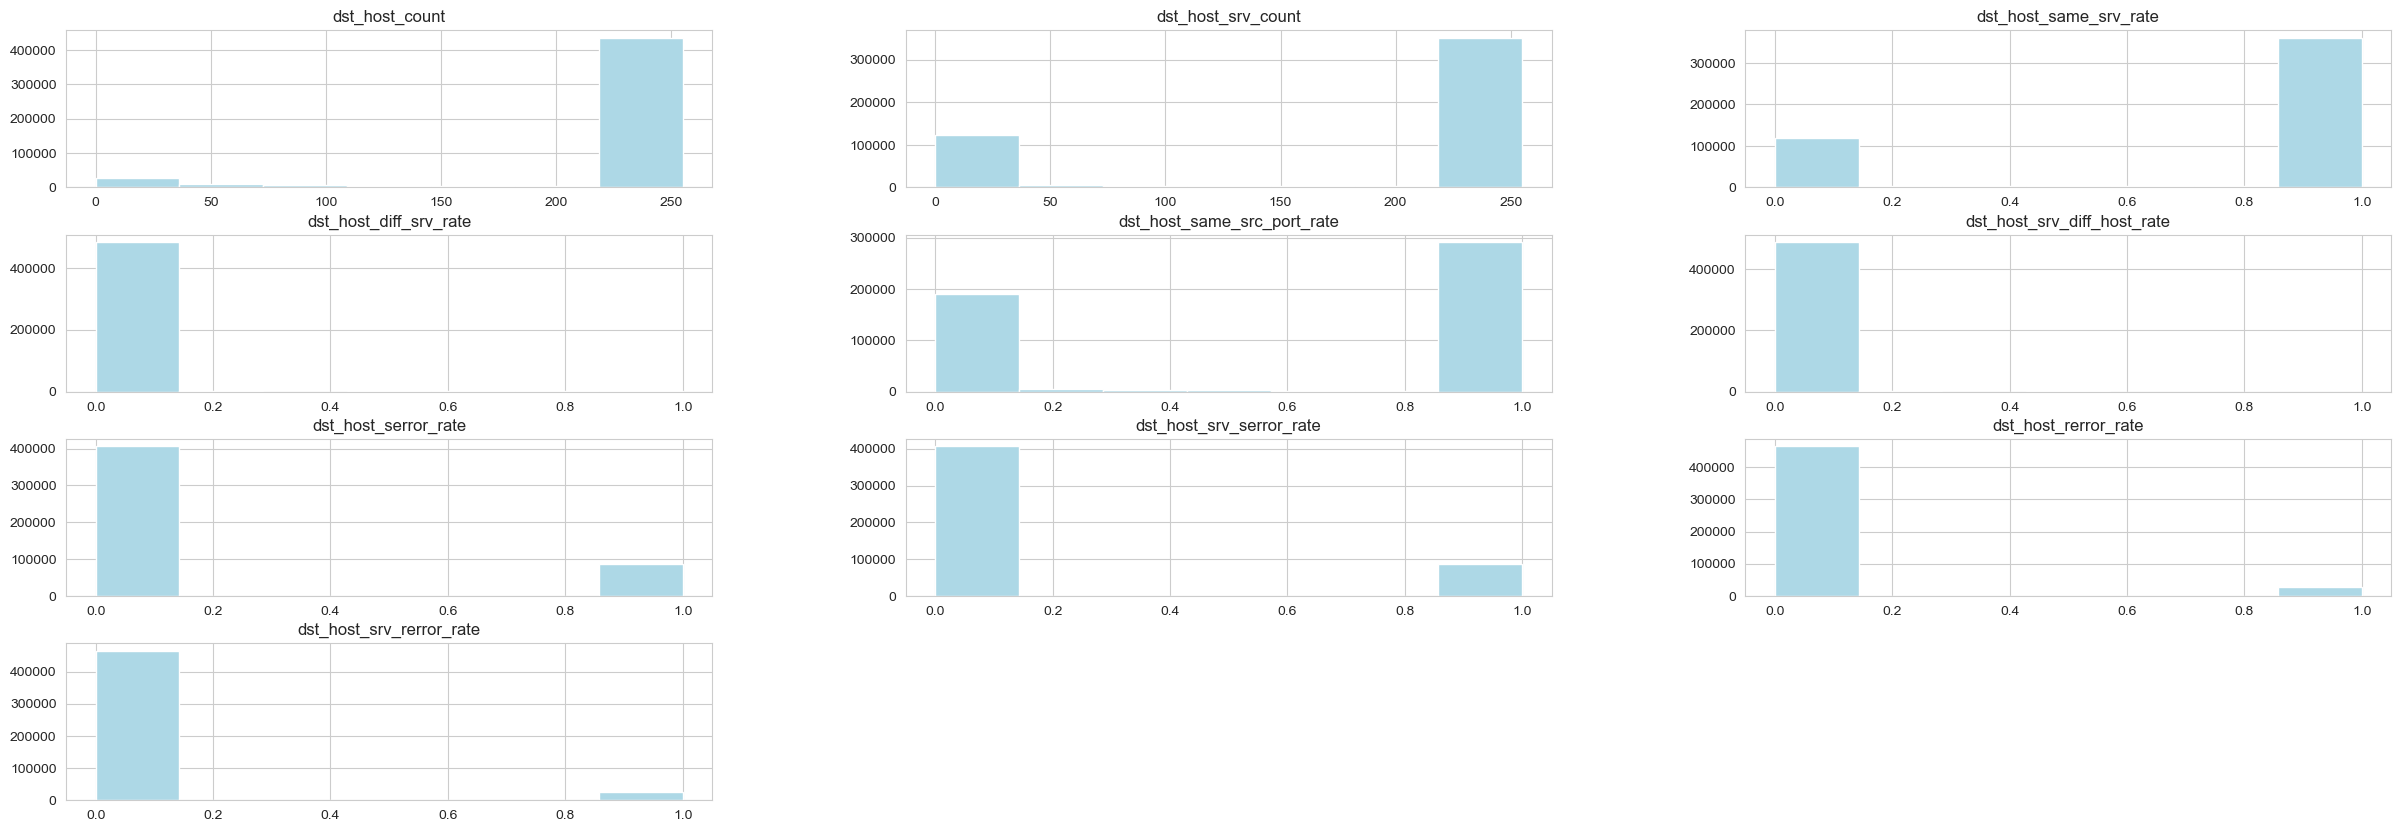

In [212]:
DstTraffic_data.hist(figsize=(30, 10), bins=7, color='lightblue') #目标本机 传输数据特征

# 相关性分析
4种相关特征的相关性分析

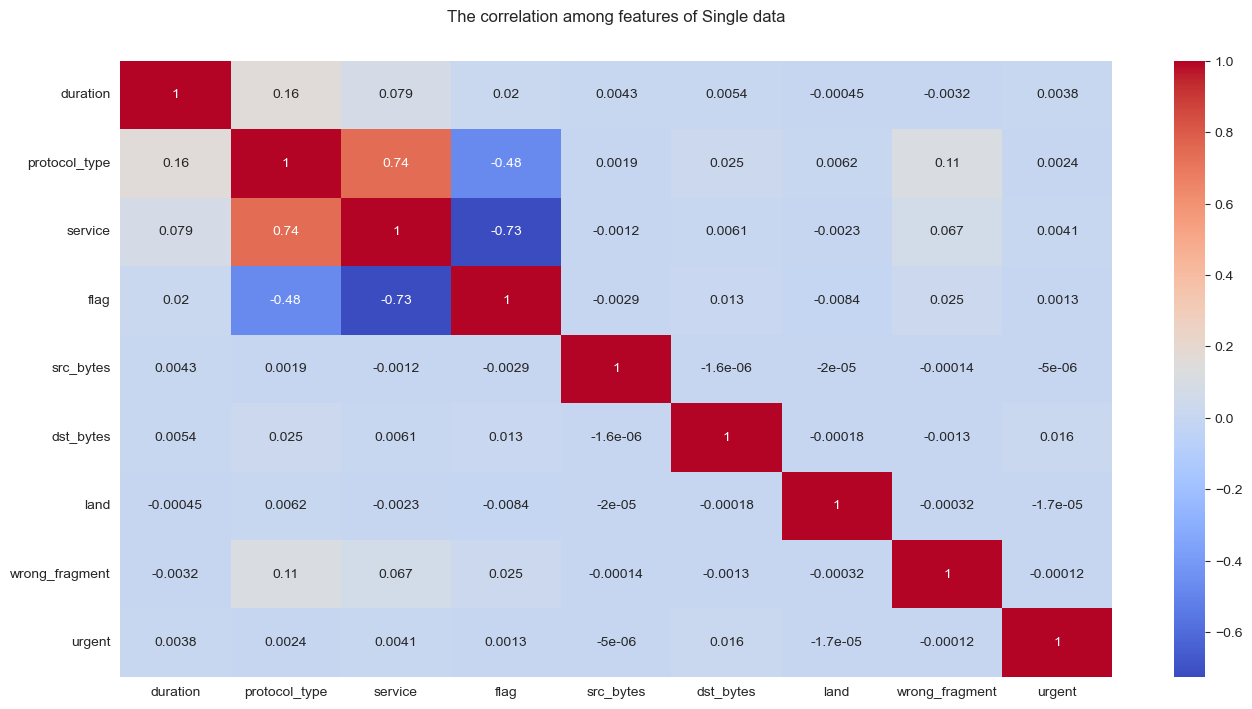

In [213]:
# 单个tcp相关性分析
correlation_matrix = single_connect_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of Single data',y= 1.05)
plt.savefig('./picture/correlation_single.png')

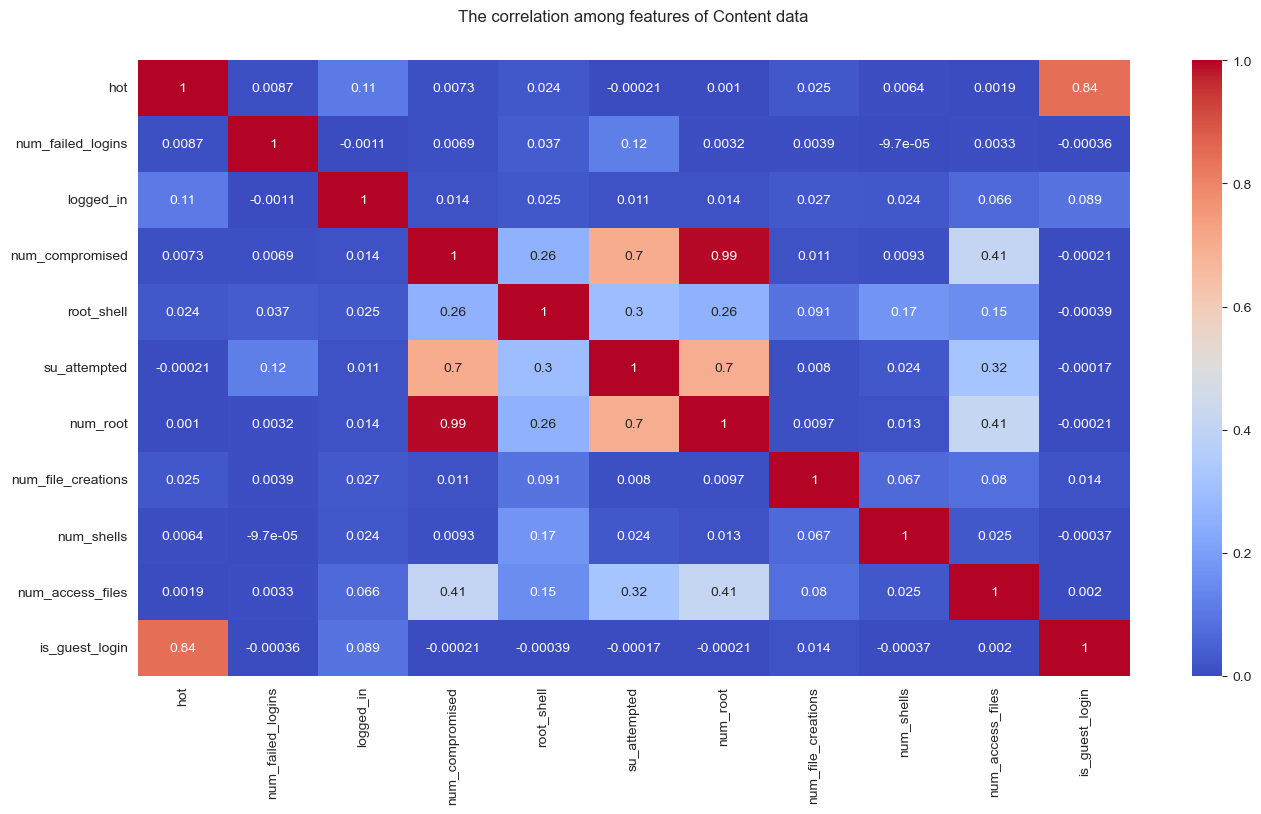

In [214]:
# 连接特征相关性分析
correlation_matrix = Content_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of Content data',y= 1.05)
plt.savefig('./picture/correlation_Content.png')

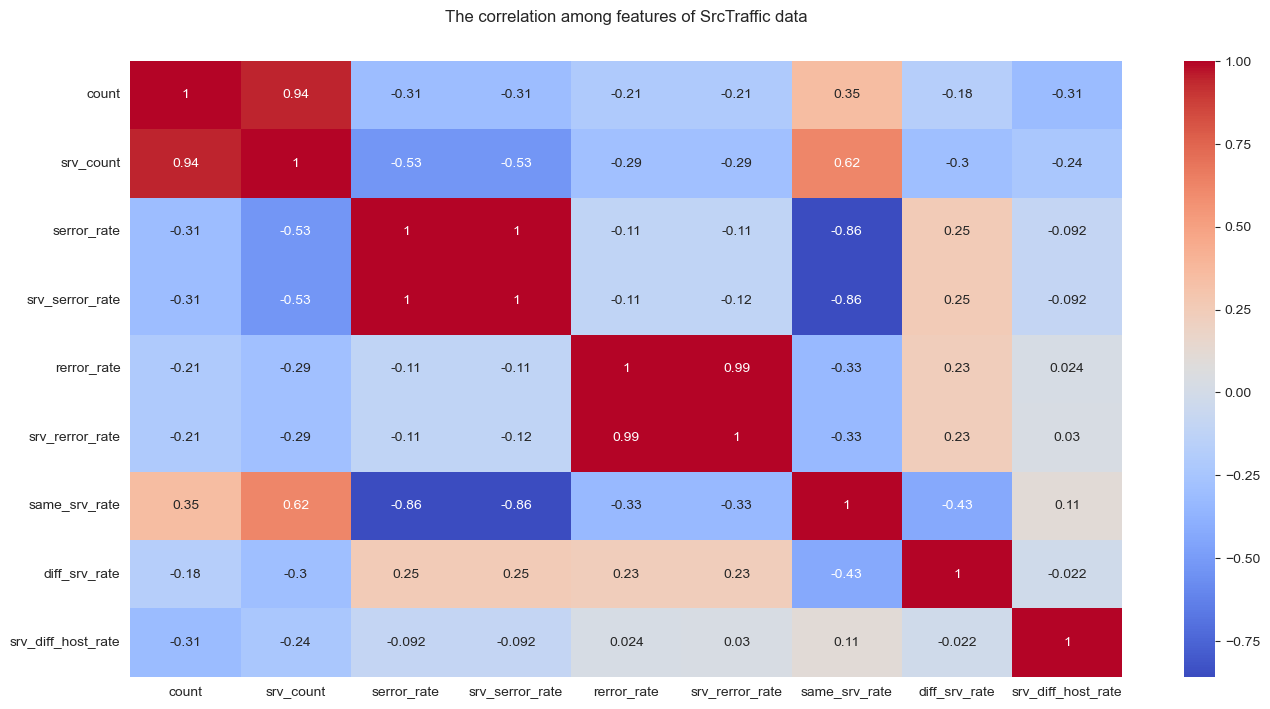

In [215]:
# 连接特征相关性分析
correlation_matrix = SrcTraffic_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of SrcTraffic data',y= 1.05)
plt.savefig('./picture/correlation_SrcTraffic.png')

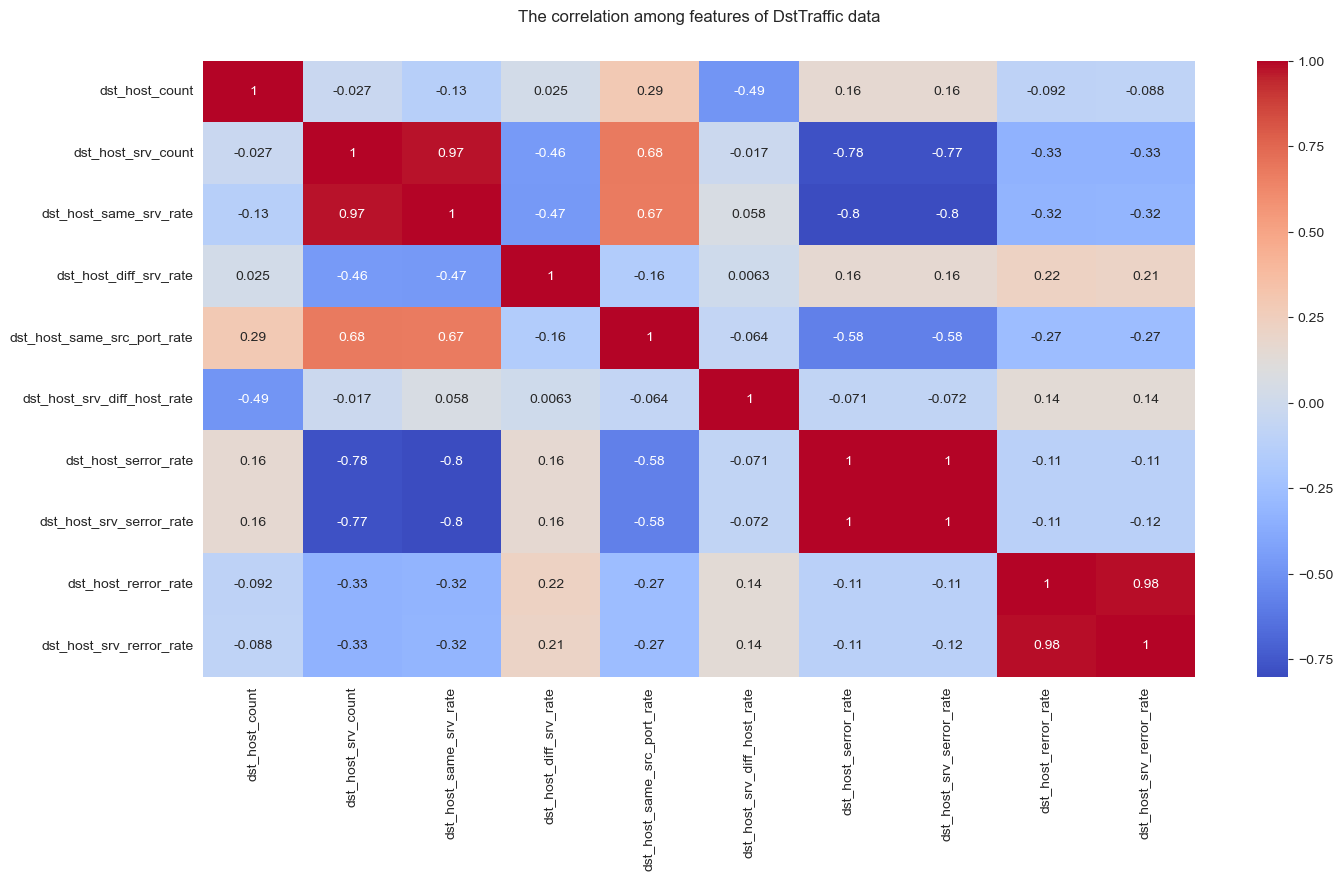

In [216]:
# 连接特征相关性分析
correlation_matrix = DstTraffic_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of DstTraffic data',y= 1.05)
plt.savefig('./picture/correlation_DstTraffic.png')

# 整体分析

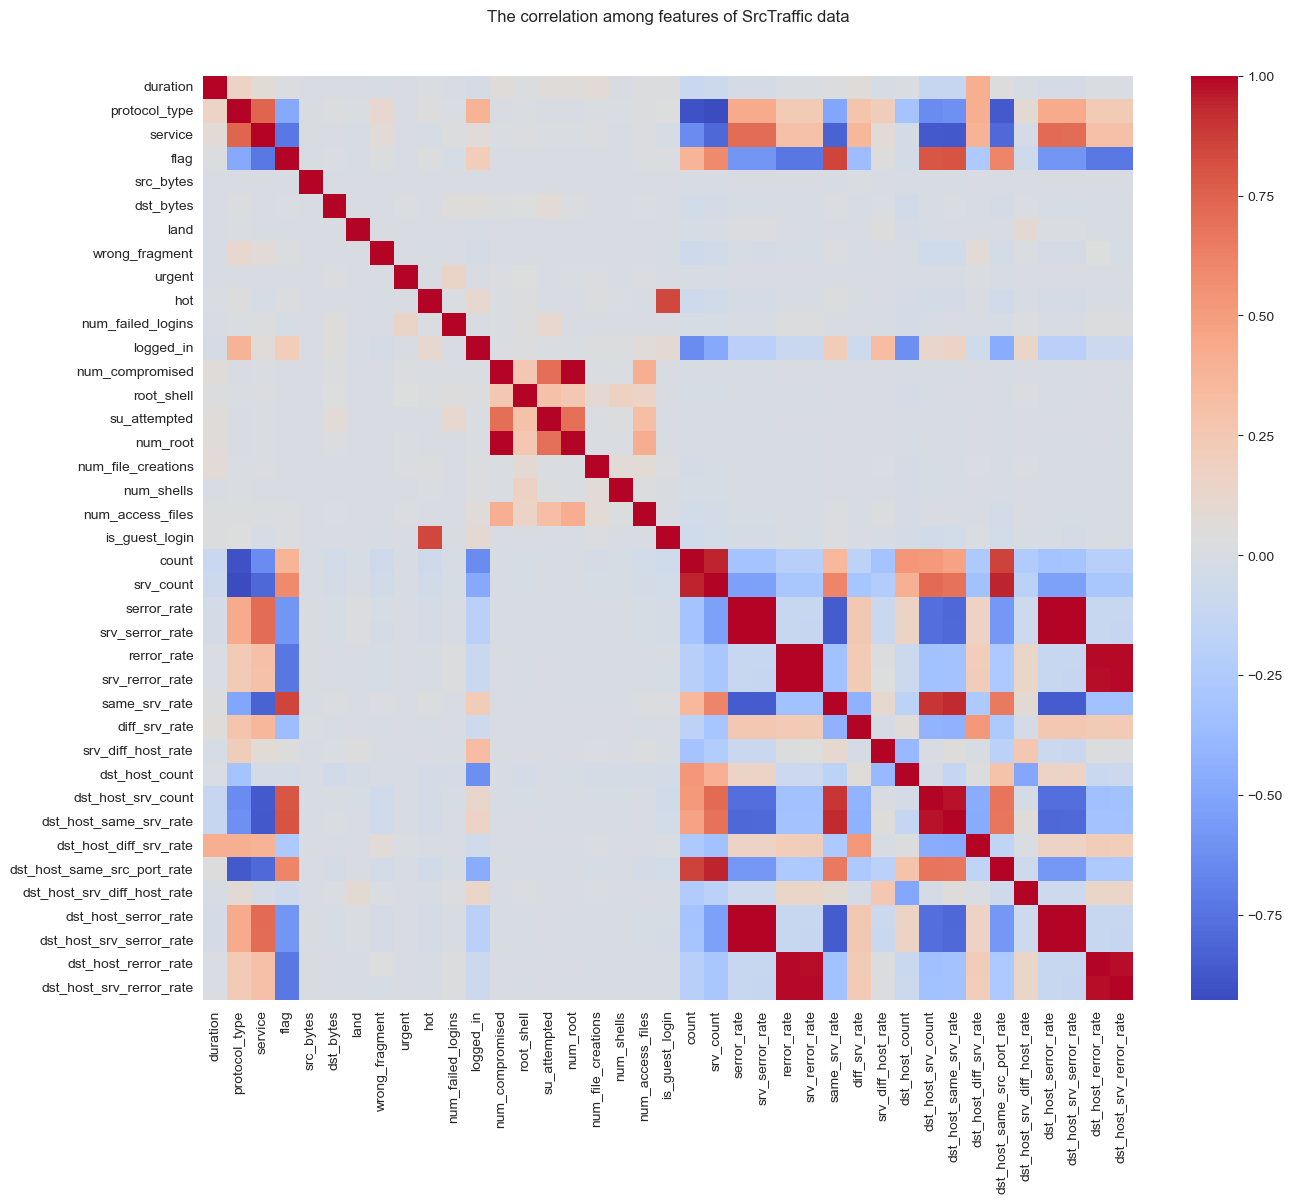

In [217]:
# 连接特征相关性分析
correlation_matrix = x.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap = "coolwarm")
plt.title('The correlation among features of SrcTraffic data',y= 1.05)
plt.savefig('./picture/correlation_Alldata.png')

In [218]:
#查看属性相关性，高相关的属性需要在后面删除一个，相当于去除冗余
x['num_root'].corr(x['num_compromised'])

0.9938277978738366

In [219]:
x['srv_serror_rate'].corr(x['serror_rate'])

0.9983615072725952

In [220]:
x['srv_count'].corr(x['count'])

0.9436670688882655

In [221]:
x['srv_rerror_rate'].corr(x['rerror_rate'])

0.9947309539817937

In [222]:
x['dst_host_same_srv_rate'].corr(x['dst_host_srv_count'])

0.9736854572953983

In [223]:
x['dst_host_srv_rerror_rate'].corr(x['dst_host_rerror_rate'])

0.9848038371110298

In [224]:
x['dst_host_srv_serror_rate'].corr(x['dst_host_serror_rate'])

0.9981559173373309

In [225]:
x['dst_host_same_srv_rate'].corr(x['same_srv_rate'])

0.9278080342691242

In [226]:
x['dst_host_srv_count'].corr(x['same_srv_rate'])

0.8989546630324209

In [227]:
x['dst_host_same_src_port_rate'].corr(x['srv_count'])

0.9449263676783333

In [228]:
x['dst_host_serror_rate'].corr(x['serror_rate'])

0.9986729680105015

In [229]:
x['dst_host_serror_rate'].corr(x['srv_serror_rate'])

0.997835300373975

In [230]:
x['dst_host_srv_serror_rate'].corr(x['serror_rate'])

0.9978492485680104

In [231]:
x['dst_host_srv_serror_rate'].corr(x['srv_serror_rate'])

0.9993041091850098

In [232]:
x['dst_host_rerror_rate'].corr(x['rerror_rate'])

0.9869947924956001

In [233]:
x['dst_host_rerror_rate'].corr(x['srv_rerror_rate'])

0.9821663427308375

In [234]:
x['dst_host_srv_rerror_rate'].corr(x['rerror_rate'])

0.9851995540751249

In [235]:
x['dst_host_srv_rerror_rate'].corr(x['srv_rerror_rate'])

0.9865705438845669

In [236]:
#删除冗余属性

x.drop('num_root',axis = 1,inplace = True)

x.drop('srv_serror_rate',axis = 1,inplace = True)

x.drop('srv_rerror_rate',axis = 1, inplace=True)

x.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

x.drop('dst_host_serror_rate',axis = 1, inplace=True)

x.drop('dst_host_rerror_rate',axis = 1, inplace=True)

x.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

x.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [237]:
df_std = x.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
protocol_type                       0.575606
hot                                 0.782103
num_compromised                     1.798326
flag      

In [238]:
x.shape

(494021, 31)

In [239]:
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,22,9,181,5450,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00
1,0,1,22,9,239,486,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00
2,0,1,22,9,235,1337,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00
3,0,1,22,9,219,1337,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00
4,0,1,22,9,217,2032,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,0.00,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05
494017,0,1,22,9,282,2286,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05
494018,0,1,22,9,203,1200,0,0,0,0,...,0.17,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05
494019,0,1,22,9,291,1200,0,0,0,0,...,0.00,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05


In [240]:
# Target variable and train set
Y = data[['attack_type']]
feature_name = x.columns.tolist()

sc = MinMaxScaler()
X = sc.fit_transform(x)
data = pd.DataFrame(X, columns=feature_name)
data = pd.concat([data, labels], axis=1)
data.to_csv("./dataset/kdd_cup99_10_percent.csv",index=False)